In [2]:
import numpy as np, matplotlib.pyplot as plt

## Exercises for Chapter 6

```
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%                                                                %%%
%%%     COMPUTATIONAL PHYSICS, M. NEWMAN, CHAPTER 6, EXERCISES     %%%
%%%                                                                %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
```

### Exercise 6.1 

**A circuit of resistors**

  Consider the following circuit of
resistors:

<img src="resistor.png"  width=300>

All the resistors have the same resistance $R$.  The power rail at the top
is at voltage $V_+=5\,$V.  What are the other four voltages, $V_1$
to $V_4$?

To answer this question we use Ohm's law and the Kirchhoff current
law, which says that the total net current flow out of (or into) any
junction in a circuit must be zero.  Thus for the junction at
voltage $V_1$, for instance, we have
$$
{V_1-V_2\over R} + {V_1-V_3\over R} + {V_1-V_4\over R} + {V_1-V_+\over R}
= 0,
$$
or equivalently
$$
4V_1 - V_2 - V_3 - V_4 = V_+.
$$


1. Write similar equations for the other three junctions with unknown
voltages.
1. Write a program to solve the four resulting equations using Gaussian
  elimination and hence find the four voltages (or you can modify a program
  you already have, such as the program \verb|gausselim.py| in
  Example 6.1).

#### 解
1. 写出其他链接点的方程
\begin{align}
\frac{V_2-V_1}{R}+\frac{V_2}{R}+\frac{V_2-V_4}{R}=0\\
\frac{V_3-V_+}{R}+\frac{V_3-V_1}{R}+\frac{V_3-V_4}{R}=0\\
\frac{V_4}{R}+\frac{V_4-V_2}{R}+\frac{V_4-V_1}{R}+\frac{V_4-V_3}{R}=0\\
\end{align}
四个节点的所有方程为
\begin{align}
4V_1 - V_2 - V_3 - V_4 = V_+\\
-V_1+3V_2-V_4=0\\
-V_1+3V_3-V_4=V_+\\
-V_1-V_2-V_3+4V_4=0\\
\end{align}

2. 系数矩阵为
$$A=\begin{bmatrix}
4&-1&-1&-1\\
-1&3&0&-1\\
-1&0&3&-1\\
-1&-1&-1&4\\
\end{bmatrix}
$$
常数矩阵为
$$
b=\begin{bmatrix}
5\\
0\\
5\\
0
\end{bmatrix}
$$

In [6]:
A = np.array([[4,-1,-1,-1],[-1,3,0,-1],[-1,0,3,-1],[-1,-1,-1,4]])
b = np.array([5,0,5,0])
np.linalg.solve(A,b)

array([3.        , 1.66666667, 3.33333333, 2.        ])

### Exercise 6.2 

 

1. Modify the program \verb|gausselim.py| in Example 6.1 to incorporate
  partial pivoting (or you can write your own program from scratch if you
  prefer).  Run your program and demonstrate that it gives the same answers
  as the original program when applied to Eq. (6.1)
1. Modify the program to solve the equations in (6.17) and show that it
  can find the solution to these as well, even though Gaussian elimination
  without pivoting fails.

### Exercise 6.3 

**LU decomposition**

  This exercise invites you to write your own
program to solve simultaneous equations using the method of LU
decomposition.

1. Starting, if you wish, with the program for Gaussian elimination in
  Example 6.1 on page 218, write a Python function that calculates the LU
  decomposition of a matrix.  The calculation is same as that for Gaussian
  elimination, except that at each step of the calculation you need to
  extract the appropriate elements of the matrix and assemble them to form
  the lower diagonal matrix $ {L}$ of Eq. (6.32).  Test your function by
  calculating the LU decomposition of the matrix from Eq. (6.2), then
  multiplying the $ {L}$ and $ {U}$ you get and verifying that you
  recover the original matrix once more.
1. Build on your LU decomposition function to create a complete program
  to solve Eq. (6.2) by performing a double backsubstitution as described
  in this section.  Solve the same equations using the function
  \verb|solve| from the \verb|numpy| package and verify that you get the
  same answer either way.
1. If you're feeling ambitious, try your hand at LU decomposition with
  partial pivoting.  Partial pivoting works in the same way for LU
  decomposition as it does for Gaussian elimination, swapping rows to get
  the largest diagonal element as explained in Section 6.1.3, but the
  extension to LU decomposition requires two additional stpng.  First,
  every time you swap two rows you also have to swap the same rows in the
  matrix $ {L}$.  Second, when you use your LU decomposition to solve a
  set of equations $ {A}\vec{x}=\vec{v}$ you will also need to perform
  the same sequence of swaps on the vector $\vec{v}$ on the right-hand
  side.  This means you need to record the swaps as you are doing the
  decomposition so that you can recreate them later.  The simplest way to
  do this is to set up a list or array in which the value of the $i$th
  element records the row you swapped with on the $i$th step of the
  process.  For instance, if you swapped the first row with the second then
  the second with the fourth, the first two elements of the list would be 2
  and 4.  Solving a set of equations for given $\vec{v}$ involves first
  performing the required sequence of swaps on the elements of $\vec{v}$
  then performing a double backsubstitution as usual.  (In ordinary
  Gaussian elimination with pivoting, one swaps the elements of $\vec{v}$
  as the algorithm proceeds, rather than all at once, but the difference
  has no effect on the results, so it's fine to perform all the swaps at
  once if we wish.)

  Modify the function you wrote for part (a) to perform LU decomposition
  with partial pivoting.  The function should return the matrices $ {L}$
  and $ {U}$ for the LU decomposition of the swapped matrix, plus a list
  of the swaps made.  Then modify the rest of your program to solve
  equations of the form $ {A}\vec{x}=\vec{v}$ using LU decomposition
  with pivoting.  Test your program on the example from Eq. (6.17), which
  cannot be solved without pivoting because of the zero in the first
  element of the matrix.  Check your results against a solution of the same
  equations using the \verb|solve| function from \verb|numpy|.

LU decomposition with partial pivoting is the most widely used method for
the solution of simultaneous equations in practice.  Precisely this method
is used in the function \verb|solve| from the \verb|numpy| package.
There's nothing wrong with using the \verb|solve| function---it's well
written, fast, and convenient.  But it does nothing you haven't already
done yourself if you've solved this exercise.

### Exercise 6.4 

  Write a program to solve the resistor network problem of
Exercise 6.1 on page 220 using the function \verb|solve| from
\verb|numpy.linalg|.  If you also did Exercise 6.1, you should check that
you get the same answer both times.

### Exercise 6.5 

  Here's a more complicated circuit problem:


<img src="rescap.png" width=300>

The voltage $V_+$ is time-varying and sinusoidal of the form $V_+ = x_+
 e^{ i \omega t}$ with $x_+$ a constant.  The resistors in the circuit can
be treated using Ohm's law as usual.  For the capacitors the charge $Q$ and
voltage $V$ across them are related by the capacitor law $Q=CV$, where $C$
is the capacitance.  Differentiating both sides of this expression gives
the current $I$ flowing in on one side of the capacitor and out on the
other:
$$
I = { d Q\over d t} = C { d V\over d t}.
$$

1. Assuming the voltages at the points labeled 1, 2, and 3 are of the form
$V_1 = x_1  e^{ i \omega t}$, $V_2 = x_2  e^{ i \omega t}$, and $V_3 = x_3
 e^{ i \omega t}$, apply Kirchhoff's law at each of the three points, along
with Ohm's law and the capacitor law, to show that the constants $x_1$,
$x_2$, and $x_3$ satisfy the equations
\begin{align*}
\biggl( {1\over R_1} + {1\over R_4} +  i \omega C_1 \biggr) x_1
  -  i \omega C_1 x_2 &= {x_+\over R_1}\,, \\
-  i \omega C_1 x_1
+ \biggl( {1\over R_2} + {1\over R_5} +  i \omega C_1 +  i \omega C_2
          \biggr) x_2 -  i \omega C_2 x_3 &= {x_+\over R_2}\,, \\
-  i \omega C_2 x_2
+ \biggl( {1\over R_3} + {1\over R_6} +  i \omega C_2 \biggr) x_3
  &= {x_+\over R_3}\,.
\end{align*}
1. Write a program to solve for $x_1$, $x_2$, and $x_3$ when
\begin{align*}
R_1 &= R_3 = R_5 = 1\,\mathrm{k}\Omega, \\
R_2 &= R_4 = R_6 = 2\,\mathrm{k}\Omega, \\
C_1 &= 1\,\mu\mathrm{F},\qquad C_2 = 0.5\,\mu\mathrm{F}, \\
x_+ &= 3\,\mathrm{V},\qquad \omega = 1000\,\mathrm{s}^{-1}.
\end{align*}
Notice that the matrix for this problem has complex elements.  You will
need to define a complex array to hold it, but you can still use the
\verb|solve| function just as before to solve the equations---it works with
either real or complex arguments.  Using your solution have your program
calculate and print the amplitudes of the three voltages $V_1$, $V_2$,
and $V_3$ and their phases in degrees.  (Hint: You may find the functions
\verb|polar| or \verb|phase| in the \verb|cmath| package useful.  If
\verb|z| is a complex number then ``\verb|r,theta = polar(z)|'' will return
the modulus and phase (in radians) of \verb|z| and
``\verb|theta = phase(z)|'' will return the phase alone.)

### Exercise 6.6 

  Starting with either the program \verb|springs.py| on page 237 or
\verb|springsb.py| on page 238, remove the code that makes a graph of the
results and replace it with code that creates an animation of the masses as
they vibrate back and forth, their displacements relative to their resting
positions being given by the real part of Eq. (6.53).  For clarity, assume
that the resting positions are two units apart in a horizontal line.  At a
minimum your animation should show each of the individual masses, perhaps
as small spheres.  (Spheres of radius about 0.2 or 0.3 seem to work well.)

### Exercise 6.7 

**A chain of resistors**

  Consider a long chain of resistors
wired up like this:

<img src = "reschain.png">

All the resistors have the same resistance $R$.  The power rail at the top
is at voltage $V_+=5$V.  The problem is to find the voltages $V_1\ldots
V_N$ at the internal points in the circuit.

1. Using Ohm's law and the Kirchhoff current law, which says that the
  total net current flow out of (or into) any junction in a circuit must be
  zero, show that the voltages $V_1\ldots V_N$ satisfy the equations
\begin{align*}
3V_1 - V_2 - V_3 &= V_+, \\
-V_1 + 4V_2 - V_3 - V_4 &= V_+, \\
                        &\hspace{0.6em}\vdots \\
-V_{i-2} - V_{i-1} + 4V_i - V_{i+1} - V_{i+2} &= 0, \\
                        &\hspace{0.6em}\vdots \\
-V_{N-3} - V_{N-2} + 4V_{N-1} - V_N &= 0, \\
-V_{N-2} - V_{N-1} + 3V_N &= 0.
\end{align*}
Express these equations in vector form ${A}\vec{v} = \vec{w}$ and find
the values of the matrix ${A}$ and the vector $\vec{w}$.
1. Write a program to solve for the values of the $V_i$ when there are
  $N=6$ internal junctions with unknown voltages.  (Hint: All the values of
  $V_i$ should lie between zero and $5$V.  If they don't, something is
  wrong.)
1. Now repeat your calculation for the case where there are $N=10\,000$
  internal junctions.  This part is not possible using standard tools like
  the \verb|solve| function.  You need to make use of the fact that the
  matrix $\vec{A}$ is banded and use the \verb|banded| function from the
  file \verb|banded.py|, discussed in Appendix E.

### Exercise 6.8 

**The QR algorithm**

  In this exercise you'll write a
program to calculate the eigenvalues and eigenvectors of a real symmetric
matrix using the QR algorithm.  The first challenge is to write a program
that finds the QR decomposition of a matrix.  Then we'll use that
decomposition to find the eigenvalues.

As described above, the QR decomposition expresses a real square
matrix $ {A}$ in the form $ {A}= {Q} {R}$, where $ {Q}$ is
an orthogonal matrix and $ {R}$ is an upper-triangular matrix.  Given an
$N\times N$ matrix $ {A}$ we can compute the QR decomposition as
follows.

Let us think of the matrix as a set of $N$ column
vectors $\vec{a}_0\ldots\vec{a}_{N-1}$ thus:
$$
 {A} = \begin{pmatrix}
            | & | & | & \cdots \\
            \vec{a}_0 & \vec{a}_1 & \vec{a}_2 & \cdots \\
            | & | & | & \cdots
          \end{pmatrix},
$$
where we have numbered the vectors in Python fashion, starting from zero,
which will be convenient when writing the program.  We now define two new
sets of vectors $\vec{u}_0\ldots\vec{u}_{N-1}$ and
$\vec{q}_0\ldots\vec{q}_{N-1}$ as follows:
\begin{align*}
\vec{u}_0 &= \vec{a}_0,
  & \vec{q}_0 = {\vec{u}_0\over|\vec{u}_0|}\,,\qquad \\
\vec{u}_1 &= \vec{a}_1 - (\vec{q}_0\cdot\vec{a}_1) \vec{q}_0,
  & \vec{q}_1 = {\vec{u}_1\over|\vec{u}_1|}\,, \qquad \\
\vec{u}_2 &= \vec{a}_2 - (\vec{q}_0\cdot\vec{a}_2) \vec{q}_0
             - (\vec{q}_1\cdot\vec{a}_2) \vec{q}_1,
  & \vec{q}_2 = {\vec{u}_2\over|\vec{u}_2|}\,, \qquad
\end{align*}
and so forth.  The general formulas for calculating $\vec{u}_i$ and
$\vec{q}_i$ are
$$
\vec{u}_i = \vec{a}_i - \sum_{j=0}^{i-1} (\vec{q}_j\cdot\vec{a}_i)
            \vec{q}_j, \qquad
\vec{q}_i = {\vec{u}_i\over|\vec{u}_i|}.
$$

1. Show, by induction or otherwise, that the vectors $\vec{q}_i$ are
  orthonormal, i.e., that they satisfy
$$
\vec{q}_i\cdot\vec{q}_j = \biggl\lbrace\begin{array}{ll}
                            1 & \quad\mbox{if $i=j$,} \\
                            0 & \quad\mbox{if $i\ne j$.}
                          \end{array}
$$

Now, rearranging the definitions of the vectors, we have
\begin{align*}
\vec{a}_0 &= |\vec{u}_0|\,\vec{q}_0, \\
\vec{a}_1 &= |\vec{u}_1|\,\vec{q}_1 + (\vec{q}_0\cdot\vec{a}_1) \vec{q}_0, \\
\vec{a}_2 &= |\vec{u}_2|\,\vec{q}_2 + (\vec{q}_0\cdot\vec{a}_2) \vec{q}_0
              + (\vec{q}_1\cdot\vec{a}_2) \vec{q}_1,
\end{align*}
and so on.  Or we can group the vectors $\vec{q}_i$ together as the
columns of a matrix and write all of these equations as a single matrix
equation
$$A = \begin{pmatrix}
            | & | & | & \cdots \\
            \vec{a}_0 & \vec{a}_1 & \vec{a}_2 & \cdots \\
            | & | & | & \cdots
          \end{pmatrix}
 =
\begin{pmatrix}
  | & | & | & \cdots \\
  \vec{q}_0 & \vec{q}_1 & \vec{q}_2 & \cdots \\
  | & | & | & \cdots
\end{pmatrix}
\begin{pmatrix}
|\vec{u}_0| & \vec{q}_0\cdot\vec{a}_1 & \vec{q}_0\cdot\vec{a}_2 & \cdots \\
0           & |\vec{u}_1| & \vec{q}_1\cdot\vec{a}_2 & \cdots \\
0           & 0           & |\vec{u}_2| & \cdots
\end{pmatrix}.
$$
(If this looks complicated it's worth multiplying out the matrices on the
right to verify for yourself that you get the correct expressions for
the $\vec{a}_i$.)

Notice now that the first matrix on the right-hand side of this equation,
the matrix with columns $\vec{q}_i$, is orthogonal, because the
vectors $\vec{q}_i$ are orthonormal, and the second matrix is upper
triangular.  In other words, we have found the QR decomposition
$ {A}= {Q} {R}$.  The matrices $ {Q}$ and $ {R}$ are
$$
 {Q} =
\begin{pmatrix}
  | & | & | & \cdots \\
  \vec{q}_0 & \vec{q}_1 & \vec{q}_2 & \cdots \\
  | & | & | & \cdots
\end{pmatrix}
,\qquad
 {R} =
\begin{pmatrix}
|\vec{u}_0| & \vec{q}_0\cdot\vec{a}_1 & \vec{q}_0\cdot\vec{a}_2 & \cdots \\
0           & |\vec{u}_1| & \vec{q}_1\cdot\vec{a}_2 & \cdots \\
0           & 0           & |\vec{u}_2| & \cdots
\end{pmatrix}.
$$


1. Write a Python function that takes as its argument a real square
  matrix $ {A}$ and returns the two matrices $ {Q}$ and $ {R}$
  that form its QR decomposition.  As a test case, try out your function on
  the matrix
$$
A = \begin{pmatrix}
            1 & 4 & 8 & 4 \\
            4 & 2 & 3 & 7 \\
            8 & 3 & 6 & 9 \\
            4 & 7 & 9 & 2
          \end{pmatrix}.
$$
Check the results by multiplying $ {Q}$ and $ {R}$ together to
recover the original matrix $ {A}$ again.
1. Using your function, write a complete program to calculate the
  eigenvalues and eigenvectors of a real symmetric matrix using the QR
  algorithm.  Continue the calculation until the magnitude of every
  off-diagonal element of the matrix is smaller than $10^{-6}$.  Test your
  program on the example matrix above.  You should find that the
  eigenvalues are $1$, $21$, $-3$, and $-8$.

### Exercise 6.9 

**Asymmetric quantum well**

Quantum mechanics can be formulated as a matrix problem and solved
on a computer using linear algebra methods.  Suppose, for example, we have
a particle of mass $M$ in a one-dimensional quantum well of width $L$, but
not a square well like the examples you've probably seen before.  Suppose
instead that the potential $V(x)$ varies somehow inside the well: 

<img src="well.png">

We cannot solve such problems analytically in general, but we can solve
them on the computer.

In a pure state of energy $E$, the spatial part of the wavefunction
obeys the time-independent Schr\"odinger equation $\hat{H}\psi(x) =
E\psi(x)$, where the Hamiltonian operator $\hat{H}$ is given by
$$
\hat{H} = - {\hbar^2\over2M}\,{ d^2\over d x^2} + V(x).
$$

For simplicity, let's assume that the walls of the well are infinitely
high, so that the wavefunction is zero outside the well, which means it
must \emph{go to} zero at $x=0$ and $x=L$.  In that case, the wavefunction
can be expressed as a Fourier sine series thus:
$$
\psi(x) = \sum_{n=1}^\infty \psi_n \sin {\pi n x\over L},
$$
where $\psi_1,\psi_2,\ldots$ are the Fourier coefficients.

1. Noting that, for $m,n$ positive integers
$$
\int_0^L \sin {\pi m x\over L} \,\sin{\pi n x\over L} \> d x
  = \begin{cases}
      L/2 & \qquad\mbox{if $m=n$,} \\
      0          & \qquad\mbox{otherwise,}
    \end{cases}
$$
show that the Schr\"odinger equation $\hat{H}\psi = E\psi$ implies that
$$
\sum_{n=1}^\infty \psi_n \int_0^L \sin{\pi m x\over L}
                  \hat{H}\sin{\pi n x\over L} \> d x
  = \frac{1}{2} L E \psi_m.
$$
Hence, defining a matrix ${H}$ with elements
\begin{align*}
H_{mn} &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \hat{H}\sin{\pi n x\over L} \> d x \nonumber\\
       &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \biggl[ - {\hbar^2\over2M}\,{ d^2\over d x^2} + V(x) \biggr]
          \sin{\pi n x\over L} \> d x,
\end{align*}
show that Schr\"odinger's equation can be written in matrix form as
${H}{\psi} = E{\psi}$, where ${\psi}$
is the vector $(\psi_1,\psi_2,\ldots)$.  Thus ${\psi}$ is an
eigenvector of the \defn{Hamiltonian matrix} ${H}$ with eigenvalue $E$.
If we can calculate the eigenvalues of this matrix, then we know the
allowed energies of the particle in the well.
1. For the case $V(x)=ax/L$, evaluate the integral in $H_{mn}$
  analytically and so find a general expression for the matrix
  element $H_{mn}$.  Show that the matrix is real and symmetric.  You'll
  probably find it useful to know that
$$
\hspace{-2em}
\int_0^L x \sin{\pi m x\over L} \sin{\pi n x\over L} \> d x
  = \begin{cases}
      0 & \quad\mbox{if $m\ne n$ and both even or both odd,} \\
      {\displaystyle-\biggl({2L\over\pi}\biggr)^2{mn\over(m^2-n^2)^2}}
        & \quad\mbox{if $m\ne n$ and one is even, one is odd,} \\
      L^2/4 & \quad\mbox{if $m=n$.}
    \end{cases}
$$
Write a Python program to evaluate your expression for $H_{mn}$ for
arbitrary $m$ and $n$ when the particle in the well is an electron, the
well has width $5\,$\AA, and $a=10\,$eV.  (The mass and charge of an
electron are $9.1094\times10^{-31}\,$kg and $1.6022\times10^{-19}\,$C
respectively.)
1. The matrix ${H}$ is in theory infinitely large, so we cannot
  calculate all its eigenvalues.  But we can get a pretty accurate solution
  for the first few of them by cutting off the matrix after the first few
  elements.  Modify the program you wrote for part (b) above to create a
  $10\times10$ array of the elements of ${H}$ up to $m,n=10$.
  Calculate the eigenvalues of this matrix using the appropriate function
  from \verb|numpy.linalg| and hence print out, in units of electron volts,
  the first ten energy levels of the quantum well, within this
  approximation.  You should find, for example, that the ground-state
  energy of the system is around $5.84\,$eV.  (Hint: Bear in mind that
  matrix indices in Python start at zero, while the indices in standard
  algebraic expressions, like those above, start at one.  You will need to
  make allowances for this in your program.)
1. Modify your program to use a $100\times100$ array instead and again
  calculate the first ten energy eigenvalues.  Comparing with the values
  you calculated in part (c), what do you conclude about the accuracy of
  the calculation?
1. Now modify your program once more to calculate the
  wavefunction $\psi(x)$ for the ground state and the first two excited
  states of the well.  Use your results to make a graph with three curves
  showing the probability density $|\psi(x)|^2$ as a function of $x$ in
  each of these three states.  Pay special attention to the normalization
  of the wavefunction---it should satisfy the condition $\int_0^L
  |\psi(x)|^2 \> d x=1$.  Is this true of your wavefunction?

### Exercise 6.10 

  Consider the equation $x = 1 -  e^{-cx}$, where $c$ is a known
parameter and $x$ is unknown.  This equation arises in a variety of
situations, including the physics of contact processes, mathematical models
of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation
  method for the case $c=2$.  Calculate your solution to an accuracy of at
  least $10^{-6}$.
1. Modify your program to calculate the solution for values of $c$ from
  0 to 3 in stpng of 0.01 and make a plot of $x$ as a function of $c$.  You
  should see a clear transition from a regime in which $x=0$ to a regime of
  nonzero $x$.  This is another example of a phase transition.  In physics
  this transition is known as the \defn{percolation transition}; in
  epidemiology it is the \defn{epidemic threshold}.

考虑方程  $x = 1 - e^{-cx}$，其中 $c$ 是已知参数，$x$ 是未知数。这个方程出现在多种情况下，包括接触过程的物理学、流行病的数学模型以及随机图理论。 
1. 编写一个程序，使用松弛法求解这个方程，对于 $c=2$ 的情况。计算您的解决方案，精度至少达到$10^{-6}$。 
2. 修改您的程序，计算$c$ 的值从 0 到 3，步长为 0.01，绘制$x$随$c$变化的函数图。您应该看到一个明显的从$x=0$的区域到非零$x$的区域的转变。这是相变的另一个例子。在物理学中，这种转变被称为**渗透转变**；在流行病学中，它是**流行病阈值**。

对于 c = 2，方程的解是 x = 4.76837158203125e-07


/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

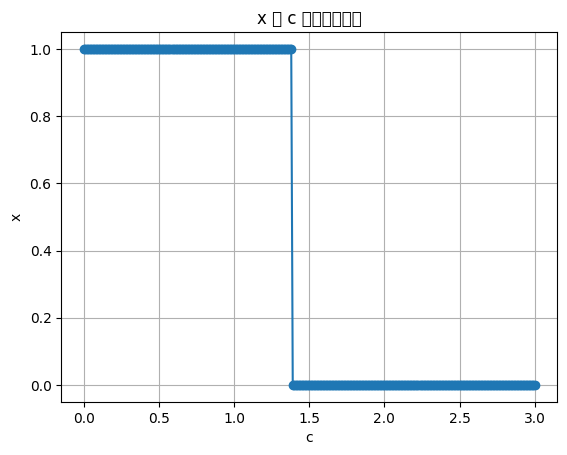

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 二分法求解方程
def binary_search(c, tolerance=1e-6):
    left, right = 0, 1  # 初始搜索区间
    while abs(right - left) > tolerance:
        mid = (left + right) / 2
        if 1 - math.exp(-c * mid) - mid > 0:
            right = mid
        else:
            left = mid
    return (left + right) / 2

# 计算不同c值对应的x值
def calculate_x_values(c_min, c_max, step):
    c_values = np.arange(c_min, c_max + step, step)
    x_values = [binary_search(c) for c in c_values]
    return c_values, x_values

# 解决 c = 2 的情况
c_value = 2
solution = binary_search(c_value)
print(f"对于 c = {c_value}，方程的解是 x = {solution}")

# 计算 c 从 0 到 3 的 x 值，并绘制函数图
c_values, x_values = calculate_x_values(0, 3, 0.01)

# 绘制 x 随 c 变化的函数图
plt.plot(c_values, x_values, marker='o')
plt.xlabel('c')
plt.ylabel('x')
plt.title('x 随 c 变化的函数图')
plt.grid(True)
plt.show()

### Exercise 6.11 

**Overrelaxation**

  If you did not already do Exercise 6.10, you should do it before
this one.

The ordinary relaxation method involves iterating the equation $x' = f(x)$,
starting from an initial guess, until it converges.  As we have seen, this
is often a fast and easy way to find solutions to nonlinear equations.
However, it is possible in some cases to make the method work even faster
using the technique of \defn{overrelaxation}.  Suppose our initial guess at
the solution of a particular equation is, say, $x=1$, and the final, true
solution is $x=5$.  After the first step of the iterative process, we might
then see a value of, say, $x=3$.  In the overrelaxation method, we observe
this value and note that $x$ is increasing, then we deliberately overshoot
the calculated value, in the hope that this will get us closer to the final
solution---in this case we might pass over $x=3$ and go straight to a value
of $x=4$ perhaps, which is closer to the final solution of $x=5$ and hence
should get us to that solution quicker.  The overrelaxation method
provides a formula for performing this kind of overshooting in a controlled
fashion and often, though not always, it does get us to our solution
faster.  In detail, it works as follows.

We can rewrite the equation $x'=f(x)$ in the form $x' = x + \Delta x$,
where
$$
\Delta x = x' - x = f(x) - x.
$$
The overrelaxation method involves iteration of the modified equation
$$
x' = x + (1+\omega)\,\Delta x,
$$
(keeping the definition of $\Delta x$ the same).  If the parameter $\omega$
is zero, then this is the same as the ordinary relaxation method, but for
$\omega>0$ the method takes the amount $\Delta x$ by which the value of $x$
would have been changed and changes by a little more.  Using $\Delta
x=f(x)-x$, we can also write $x'$ as
$$
x' = x + (1+\omega) \bigl[ f(x) - x \bigr]
   = (1+\omega) f(x) - \omega x,
$$
which is the form in which it is usually written.

For the method to work the value of $\omega$ must be chosen correctly,
although there is some wiggle room---there is an optimal value, but other
values close to it will typically also give good results.  Unfortunately,
there is no general theory that tells us what the optimal value is.
Usually it is found by trial and error.

1. Derive an equivalent of Eq. (6.81) for the overrelaxation method and
  hence show that the error on $x'$, the equivalent of Eq. (6.83), is given
  by
$$
\epsilon' \simeq {x-x'\over1-1/[(1+\omega) f'(x)-\omega]}.
$$
1. Consider again the equation $x=1- e^{-cx}$ that we solved in
  Exercise 6.10.  Take the program you wrote for part (a) of that exercise,
  which solved the equation for the case $c=2$, and modify it to print out
  the number of iterations it takes to converge to a solution accurate to
  $10^{-6}$.
1. Now write a new program (or modify the previous one) to solve the
  same equation $x=1- e^{-cx}$ for $c=2$, again to an accuracy of
  $10^{-6}$, but this time using overrelaxation.  Have your program print
  out the answers it finds along with the number of iterations it took to
  find them.  Experiment with different values of $\omega$ to see how fast
  you can get the method to converge.  A value of $\omega=0.5$ is a
  reasonable starting point.  With some trial and error you should be able
  to get the calculation to converge about twice as fast as the simple
  relaxation method, i.e., in about half as many iterations.
1. Are there any circumstances under which using a value $\omega<0$
  would help us find a solution faster than we can with the ordinary
  relaxation method?  (Hint: The answer is yes, but why?)

### Exercise 6.12 

  The biochemical process of \defn{glycolysis}, the
  breakdown of glucose in the body to release energy, can be modeled by the
  equations
$$
{ d x\over d t} = -x + ay + x^2 y, \qquad
{ d y\over d t} = b - ay - x^2 y.
$$
Here $x$ and $y$ represent concentrations of two chemicals, ADP and F6P,
and $a$ and $b$ are positive constants.  One of the important features of
nonlinear linear equations like these is their \defn{stationary
  points}, meaning values of $x$ and $y$ at which the derivatives of both
variables become zero simultaneously, so that the variables stop changing
and become constant in time.  Setting the derivatives to zero above, the
stationary points of our glycolysis equations are solutions of
$$
-x + ay + x^2 y = 0, \qquad b - ay - x^2 y = 0.
$$

1. Demonstrate analytically that the solution of these equations is
$$
x = b,\qquad y = {b\over a+b^2}.
$$
1. Show that the equations can be rearranged to read
$$
x = y(a+x^2),\qquad y = {b\over a+x^2}
$$
and write a program to solve these for the stationary point using the
relaxation method with $a=1$ and $b=2$.  You should find that the method
fails to converge to a solution in this case.
1. Find a different way to rearrange the equations such that when you
  apply the relaxation method again it now converges to a fixed point and
  gives a solution.  Verify that the solution you get agrees with part (a).

### Exercise 6.13

**Wien's displacement constant**

  Planck's radiation law tells us that
the intensity of radiation per unit area and per unit wavelength $\lambda$
from a black body at temperature $T$ is
$$
  I(\lambda) = {2\pi hc^2\lambda^{-5}\over e^{hc/\lambda k_BT}-1}\,,
$$
where $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is
Boltzmann's constant.


1. Show by differentiating that the wavelength $\lambda$ at which the
  emitted radiation is strongest is the solution of the equation
$$
5  e^{-hc/\lambda k_BT} + {hc\over\lambda k_BT} - 5 = 0.
$$
Make the substitution $x=hc/\lambda k_BT$ and hence show that the
wavelength of maximum radiation obeys the \defn{Wien displacement
  law}:
$$
\lambda = {b\over T}\,,
$$
where the so-called \defn{Wien displacement constant} is $b=hc/k_Bx$, and
$x$ is the solution to the nonlinear equation
$$
5  e^{-x} + x - 5 = 0.
$$
1. Write a program to solve this equation to an accuracy
  of $\epsilon=10^{-6}$ using the binary search method, and hence find a
  value for the displacement constant.
1. The displacement law is the basis for the method of
  \defn{optical pyrometry}, a method for measuring the temperatures
  of objects by observing the color of the thermal radiation they emit.
  The method is commonly used to estimate the surface temperatures of
  astronomical bodies, such as the Sun.  The wavelength peak in the
  Sun's emitted radiation falls at $\lambda=502\,\textrm{nm}$.  From the
  equations above and your value of the displacement constant, estimate the
  surface temperature of the Sun.

### 维恩位移常数

由普朗克辐射定律, 温度为$T$的黑体, 单位波长$\lambda$单位面积的辐射强度是
$$I(\lambda)=\frac{2\pi hc^2\lambda^{-5}}{e^{hc/\lambda k_BT}-1},$$
这里$h$是普朗克常数, $c$是光速, $k_B$是玻尔兹曼常数.

1. 将上式对波长$\lambda$求导数, 达到辐射强度最大的波长满足方程
	$$5e^{-hc/\lambda k_bT}+\frac{hc}{\lambda k_B T}-5=0.$$
	作变量代换$x=hc/\lambda k_BT$, 说明辐射最强的波长满足**维恩位移定律**:
	$$\lambda = \frac{b}{T}$$
	其中$b=hc/k_B x$被称为维恩位移常数, $x$是非线性方程
	$$5e^{-x}+x-5=0$$
	的解.
	
    

1. 写一个**二分法**的程序, 解上面的方程, 求根精度是$\epsilon=10^{-6}$, 计算维恩位移常数.


2. 维恩位移定律是光学测温方法的基础, 光学测温法是通过观察物体热辐射的颜色来测量其温度的方法. 这个方法通常用于天体表明温度的测量, 比如太阳. 已知太阳表面辐射的峰值出现在波长$\lambda=502\rm\,nm$. 从前面的方程和你得到的位移常量估计太阳的表面温度.

1. 写一个**二分法**的程序, 解上面的方程, 求根精度是$\epsilon=10^{-6}$, 计算维恩位移常数.


2. 已知太阳表面辐射的峰值出现在波长$\lambda=502\rm\,nm$. 从前面的方程和你得到的位移常量估计太阳的表面温度.

#### 首先画图查找根的大致位置

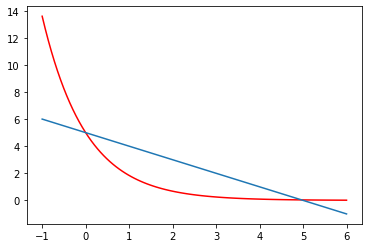

In [3]:
x = np.linspace(-1,6,100)
plt.plot(x,5*np.exp(-x),'r',x,5-x)

In [2]:
def bisect(f,a,b,ep = 1.0e-6,imax=100):
    """二分法代码
        f: 要求解的方程
        a, b: 选的边界点
        ep: 求根精度
        imax: 最大迭代次数， 防止死循环
    """
    c = (a+b)*0.5
    i = 0
    while (abs(f(c))>ep) and i < imax:
        if f(c)*f(a) >0:
            a = c
        else: b = c
        c = (a+b)*0.5
        i += 1
    if i == imax: print("迭代达到上限")
    return c,i

In [ ]:
def f(x):
    return 5*np.exp(-x)+x-5

x,k = bisect(f,4,6)
print(x,k)

In [5]:
from scipy.constants import Wien as b
nm = 1e-9 #m
lamda = 502*nm
T = b/lamda
print(f'太阳温度为: {T:.2f}K')
print(b)

太阳温度为: 5772.45K
0.002897771955


### Exercise 6.14 

  Consider a square potential well of width $w$, with walls
of height $V$:


<img src="smallwell.png">

Using Schr\"odinger's equation, it can be shown that the allowed
energies $E$ of a single quantum particle of mass $m$ trapped in the well
are solutions of
$$
\tan \sqrt{w^2mE/2\hbar^2} = \left\lbrace\begin{array}{ll}
  \sqrt{(V-E)/E} & \qquad\mbox{for the even numbered states,} \\
  - \sqrt{E/(V-E)} & \qquad\mbox{for the odd numbered states,}
\end{array}\right.
$$
where the states are numbered starting from 0, with the ground state being
state 0, the first excited state being state 1, and so forth.

1. For an electron (mass $9.1094\times10^{-31}\,$kg) in a well with $V =
  20\,$eV and $w = 1\,$nm, write a Python program to plot the three
  quantities
$$
y_1 = \tan \sqrt{w^2mE/2\hbar^2},\qquad
y_2 = \sqrt{V-E\over E},\qquad
y_3 = -\sqrt{E\over V-E},
$$
on the same graph, as a function of $E$ from $E=0$ to $E=20\,$eV.  From
your plot make approximate estimates of the energies of the first six
energy levels of the particle.
1. Write a second program to calculate the values of the first six
  energy levels in electron volts to an accuracy of $0.001\,$eV using
  binary search.

### 解薛定谔方程

有一个宽度为$w$的方势阱, 势阱高度为$V$, 

由薛定谔方程, 势阱中质量为$m$的粒子的能级是下面的超越方程的解
$$
\tan\sqrt{w^2mE/2\hbar^2}=\left\{\begin{aligned}
\sqrt{(V-E)/E},&\quad \mbox{偶宇称}\\
-\sqrt{E/(V-E)},&\quad \mbox{奇宇称}
\end{aligned}
\right.
$$
其中基态是0, 第一激发态是1, 以此类推.


1. 设一个电子(质量$9.1094\times10^{-31}$kg)处于一个$V=20$eV, $w=1$nm的势阱中, 写程序在一张图中画出三个量
	$$y_1=\tan\sqrt{w^2mE/2\hbar^2},\quad y_2=\sqrt{\frac{V-E}{E}},\quad y_3=-\sqrt{\frac{E}{V-E}}, $$
	$E$从0变化到$20$eV. 从图中近似估计前6个能级.  将$E$的变化范围写成$0.001<E<19.999$可以避免分母为零.  (提示: 1. 注意单位制要统一; 2. 在运算中避免过小的数值, 比如电子质量的量级是$10^{-31}$, $w=1\times10^{-9}$, $\hbar$的量级$10^{-34}$, 电子伏eV=1.6021766208e-19, 这些可以先行约掉一些，避免计算误差.)
	
2. 用二分法算出六个能级, 单位是电子伏(eV), 精度是0.001 eV. 解出的6个能级分别约为0.318 eV, 1.270 eV, 2.851 eV, 5.050 eV, 7.850 eV, 11.215 eV.


##### 首先画图查找根的大致位置

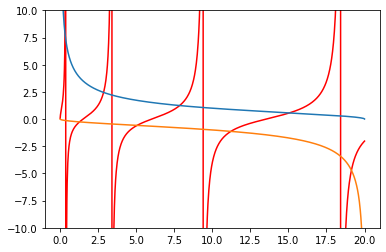

In [7]:
m0=9.1094   
ev0 = 1.6021766208
w0 = 1.
hbar0 = 6.6267004/(2.*np.pi)
V = 20     #eV
#m0, ev0, w0, hbar0 都忽略指数部分, 因为它们会互相约掉
#如果不忽略指数部分, 由于数值较小可能会导致较大误差
E = np.linspace(0.001,19.999,1000)
y1 = np.tan(np.sqrt(.5*m0*E*ev0)*w0/hbar0)
plt.plot(E,y1,'r-')
y2 = np.sqrt((V-E)/E)
plt.plot(E,y2)
plt.ylim(-10,10)
y3 = -np.sqrt(E/(V-E))
plt.plot(E,y3)

根据图像找出根的大致范围，再用二分法确定高精度的根

In [8]:
rgs = np.array([[0.30,0.34],[1.25,1.29],
                [2.8,3.0],[4.75,5.25],
                [7.6,8.2],[11.0,11.5]]) #二分法求根的范围
def f_even(E): #偶宇称方程
    return np.tan(np.sqrt(.5*m0*E*ev0)*w0/hbar0)\
             - np.sqrt((V-E)/E)
def f_odd(E):  #奇宇称方程
    return np.tan(np.sqrt(.5*m0*E*ev0)*w0/hbar0) \
            + np.sqrt(E/(V-E))
for i in range(6):
    if i%2: #奇宇称能级计算
        print("E{:d} is {:.3f}".format(i, 
              bisect(f_odd, rgs[i][0],rgs[i][1],ep=1e-3)[0]))
    else: #偶宇称能级计算
        print("E{:d} is {:.3f}".format(i, 
              bisect(f_even, rgs[i][0],rgs[i][1],ep=1e-3)[0]))

E0 is 0.318
E1 is 1.270
E2 is 2.852
E3 is 5.051
E4 is 7.851
E5 is 11.217


### Exercise 6.15 

**The roots of a polynomial**

  Consider the sixth-order polynomial
$$
P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1.
$$
There is no general formula for the roots of a sixth-order polynomial, but
one can find them easily enough using a computer.

1. Make a plot of $P(x)$ from $x=0$ to $x=1$ and by inspecting it find
  rough values for the six roots of the polynomial---the points at which
  the function is zero.
1. Write a Python program to solve for the positions of all six roots to
  at least ten decimal places of accuracy, using Newton's method.

Note that the polynomial in this example is just the sixth Legendre
polynomial (mapped onto the interval from zero to one), so the calculation
performed here is the same as finding the integration points for 6-point
Gaussian quadrature (see Section 5.6.2), and indeed Newton's method is the
method of choice for calculating Gaussian quadrature points.

**多项式的根**
                      
考虑6次多项式
$$P(x)=924x^6-2772x^5+3150x^4-1680x^3+420x^2-42x+1. $$
一般4次以上的多项式就没有求解的一般公式了, 但是可以用计算机求解.

1. 画$P(x)$的图像, $x$从0到1, 找到6个根的大致位置.
2. 用切线法找到6个根的位置, 精确到小数点后面10位.

本题中的多项式就是6阶勒让德多项式(映射到[0,1]区间), 使用这里的计算等同于计算Gauss积分的6个插值点, 实际上切线法正是计算Gauss积分样本点所采用的算法.

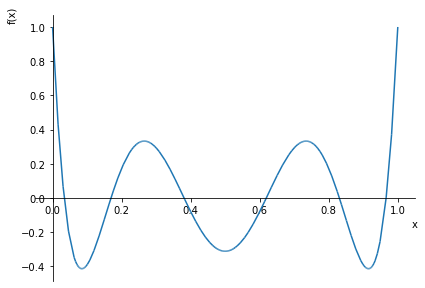

5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

In [83]:
from sympy import plot,diff,symbols
x = symbols('x')
plot(924*x**6-2772*x**5+3150*x**4-1680*x**3+420*x*x-42*x+1,(x,0,1))
diff(924*x**6-2772*x**5+3150*x**4-1680*x**3+420*x*x-42*x+1,x)

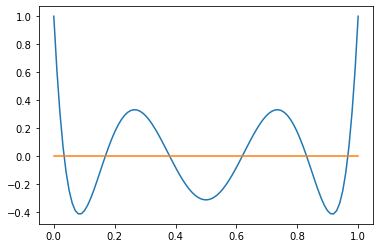

In [85]:
def p(x):
    return 924*x**6-2772*x**5+3150*x**4-1680*x**3+420*x*x-42*x+1
def df(x):
    return 5544*x**5-13860*x**4+12600*x**3-5040*x**2+840*x-42
x = np.linspace(0,1,100)
plt.plot(x,p(x))
plt.plot([0,1],[0,0])

In [86]:
def rootNewton(f, df, xs, ep=1.0e-5, Nm=100):
    """
    f: 要求解的函数
    df: 函数导数
    xs: 初始猜测值
    ep: 求根的精度
    Nm: 最大迭代次数
    """
    x = xs + 2*ep  #使迭代条件为真的一个设置
    k = 0
    while abs(x-xs)> ep and k<100:
        k = k+1
        xs = x
        x = x - f(x)/df(x) #迭代公式
    if k == Nm: raise('达到迭代次数上限')
    return x, k

In [89]:
xs = [0.01,0.2,0.4,0.6,0.86,1.0]
xf = []
for x in xs:
    xf.append(rootNewton(p,df,x)[0])
print(xf)

[0.03376524282513546, 0.16939530676686773, 0.38069040695838524, 0.6193095930416106, 0.8306046932336915, 0.9662347571015558]


In [88]:
from scipy.special import roots_legendre
xp,_=roots_legendre(6)
xr = xp*0.5+0.5
print(xr)

[0.03376524 0.16939531 0.38069041 0.61930959 0.83060469 0.96623476]


### Exercise 6.16 

**The Lagrange point**

  There is a magical point between the Earth and the Moon, called the
$L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect
synchrony with the Moon, staying always in between the two.  This works
because the inward pull of the Earth and the outward pull of the Moon
combine to create exactly the needed centripetal force that kepng the
satellite in its orbit.  Here's the setup: \bigskip

<img src="l1.png">



1. Assuming circular orbits, and assuming that the Earth is much more
  massive than either the Moon or the satellite, show that the distance $r$
  from the center of the Earth to the $L_1$ point satisfies
$$
{GM\over r^2} - {Gm\over(R-r)^2} = \omega^2 r,
$$
where $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's
gravitational constant, and $\omega$ is the angular velocity of both the
Moon and the satellite.
1. The equation above is a fifth-order polynomial equation in $r$ (also
  called a quintic equation).  Such equations cannot be solved exactly in
  closed form, but it's straightforward to solve them numerically.  Write a
  program that uses either Newton's method or the secant method to solve
  for the distance $r$ from the Earth to the $L_1$ point.  Compute a
  solution accurate to at least four significant figures.

  The values of the various parameters are:
\begin{align*}
G &= 6.674\times10^{-11}\,\mathrm{m}^3\mathrm{kg}^{-1}\mathrm{s}^{-2}, \\
M &= 5.974\times10^{24}\,\mathrm{kg}, \\
m &= 7.348\times10^{22}\,\mathrm{kg}, \\
R &= 3.844\times10^8\,\mathrm{m}, \\
\omega &= 2.662\times10^{-6}\,\mathrm{s}^{-1}.
\end{align*}
You will also need to choose a suitable starting value for $r$, or two
starting values if you use the secant method.

**拉格朗日点**

在月亮和地球之间有一个神奇的点, 被称为$L_1$拉格朗日点, 位于这个点的地球卫星和月球完全同步, 永远处于两者之间. 这是由于地球和月亮作用于卫星的万有引力将卫星保持在它的轨道上. 如下图所示:
<img src="l1.png" width=250>

1. 设轨道是圆形的, 并假设地球比月亮和卫星的质量大得多, 请说明从地心到$L_1$点的距离$r$满足
	$$\frac{GM}{r^2}-\frac{Gm}{(R-r)^2}=\omega^2r, $$
其中$M$和$m$分别是地球和月亮的质量, $G$是万有引力常数, $\omega$是月亮和卫星的角速度.

2. 上面的方程是关于$r$的5次多项式. 这个方程不能求解析解, 但是可以求数值解. 用切线法或者弦截法求解对应于$L_1$点的$r$. 解至少精确到4位有效数字.

其它常数的值如下:
\begin{align*}
G &= 6.674\times10^{-11}\,\mathrm{m}^3\mathrm{kg}^{-1}\mathrm{s}^{-2}, \\
M &= 5.974\times10^{24}\,\mathrm{kg}, \\
m &= 7.348\times10^{22}\,\mathrm{kg}, \\
R &= 3.844\times10^8\,\mathrm{m}, \\
\omega &= 2.662\times10^{-6}\,\mathrm{s}^{-1}.
\end{align*}
如果用切线法，你需要选择一个合适的初值, 如果用弦截法, 需要两个初始点.


3. 试用fsolve()求这个方程的根，和第2问的结果相比较.

In [16]:
%matplotlib qt5
def f(r,G=6.674,M = 5.974e13,m = 7.348e11,R = 3.844e8,w = 2.662e-6):
    M = 5.974e24 #kg
    m = 7.348e22 #kg
    R = 3.844e8 #m
    return G*M/r**2-G*m/(R-r)**2-w**2*r
R = 3.844e8 #m
x = np.linspace(3.2/3.8*R,R,1000)
y1 = f(x,w=0)
y2 = -f(x,G=0)
plt.plot(x,y1,x,y2)

<ipython-input-16-2739f69930e0>:8: RuntimeWarning: divide by zero encountered in true_divide
  return G*M/r**2-G*m/(R-r)**2-w**2*r
<ipython-input-16-2739f69930e0>:8: RuntimeWarning: invalid value encountered in true_divide
  return G*M/r**2-G*m/(R-r)**2-w**2*r


In [32]:
def f(r):
    G = 6.674 #e-11m^3/kg/s^2
    M = 5.974e13 #e11*kg
    m = 7.348e11 #e11*kg
    R = 3.844e8 #m
    w = 2.662e-6 #s^-1
    return G*M/r**2-G*m/(R-r)**2-w**2*r
def secand(f,xf,xs,iter_max=1000,ep=1e-5):
    """
    利用弦截法求方程的根
    f: 需要解的方程
    xf,xs: 两个初始点
    """
    iter = 0
    x = xf+2*ep  #使循环条件满足的一个设置
    while abs(x-xf)>ep and iter<iter_max:
        x = xs-f(xs)*(xs-xf)/(f(xs)-f(xf)) #迭代公式
        xf, xs = xs, x
        iter += 1
    if iter == iter_max: raise('达到迭代上限')
    return (x,iter)
res,_ = secand(f,3.0e8,3.8e8)
print(f"第一个拉格朗日点L1距离地球：{res*1e-3:.2f}公里")

第一个拉格朗日点L1距离地球：326045.07公里


326045071.66535544

### Exercise 6.17

**Nonlinear circuits**

  Exercise 6.1 used regular simultaneous equations to solve for the
behavior of circuits of resistors.  Resistors are linear---current is
proportional to voltage---and the resulting equations we need to solve are
therefore also linear and can be solved by standard matrix methods.  Real
circuits, however, often include nonlinear components.  To solve for the
behavior of these circuits we need to solve nonlinear equations.


Consider the following simple circuit, a variation on the classic
Wheatstone bridge:


<img src="nlcircuit.png">

The resistors obey the normal Ohm law, but the diode obeys the diode
equation:
$$
I = I_0 ( e^{V/V_T} - 1),
$$
where $V$ is the voltage across the diode and $I_0$ and $V_T$ are
constants.


1. The Kirchhoff current law says that the total net current flowing
  into or out of every point in a circuit must be zero.  Applying the law
  to voltage $V_1$ in the circuit above we get
$$
{V_1-V_+\over R_1} + {V_1\over R_2}
  + I_0\bigl[ e^{(V_1-V_2)/V_T} - 1\bigr] = 0.
$$
Derive the corresponding equation for voltage $V_2$.
1. Solve the two nonlinear equations for the voltages $V_1$ and $V_2$
  with the conditions
\begin{align*}
V_+ &= 5\,\textrm{V}, \\
R_1 &= 1\,\mathrm{k}\Omega, \qquad
R_2 = 4\,\mathrm{k}\Omega, \qquad
R_3 = 3\,\mathrm{k}\Omega, \qquad
R_4 = 2\,\mathrm{k}\Omega, \\
I_0 &= 3\,\textrm{nA},\qquad
V_T = 0.05\,\textrm{V}.
\end{align*}
You can use either the relaxation method or Newton's method to solve the
equations.  If you use Newton's method you can solve Eq. (6.108) for
$\Delta\vec{x}$ using the function \verb|solve()| from \verb|numpy.linalg|
if you want to, but in this case the matrix is only a $2\times2$ matrix, so
it's easy to calculate the inverse directly too.
1. The electronic engineer's rule of thumb for diodes is that the
  voltage across a (forward biased) diode is always about 0.6 volts.
  Confirm that your results agree with this rule.

**非线性电路**

考虑下图中的简单电路, 这是Wheatstone桥的一个变型:

<img src="nlcircuit.png">
    
电阻服从正则欧姆定律, 但是二极管服从二极管方程：
$$I = I_0(e^{V/V_T}-1), $$
其中$V$是二极管两端的电压, $I_0$和$V_T$是常数.

1. 由基尔霍夫电流定律, 电路中每个节点流入和流出的总电流为0. 将这个定律应用到$V_1$, 得到:
$${V_1-V_+\over R_1} + {V_1\over R_2}
	+ I_0\bigl[e^{(V_1-V_2)/V_T} - 1\bigr] = 0.$$
	推导关于$V_2$的对应方程.
2. 解关于$V_1$和$V_2$的两个非线性方程, 条件为
	\begin{align*}
	V_+ &= 5\,\textrm{V}, \\
	R_1 &= 1\,\mathrm{k}\Omega, \qquad
	R_2 = 4\,\mathrm{k}\Omega, \qquad
	R_3 = 3\,\mathrm{k}\Omega, \qquad
	R_4 = 2\,\mathrm{k}\Omega, \\
	I_0 &= 3\,\textrm{nA},\qquad
	V_T = 0.05\,\textrm{V}.
	\end{align*}
3. 电子工程师的二极管经验法则是二极管两端的电压一直都约为0.6瓦.


### Exercise 6.18

**The temperature of a light bulb**

  An incandescent light bulb is a simple device---it contains a
filament, usually made of tungsten, heated by the flow of electricity until
it becomes hot enough to radiate thermally.  Essentially all of the power
consumed by such a bulb is radiated as electromagnetic energy, but some of
the radiation is not in the visible wavelengths, which means it is useless
for lighting purposes.

Let us define the efficiency of a light bulb to be the fraction of the
radiated energy that falls in the visible band.  It's a good approximation
to assume that the radiation from a filament at temperature $T$ obeys the
Planck radiation law, meaning that the power radiated per unit
wavelength $\lambda$ obeys
$$
  I(\lambda) = 2\pi A hc^2 {\lambda^{-5}\over e^{hc/\lambda k_BT}-1},
$$
where $A$ is the surface area of the filament, $h$ is Planck's constant,
$c$ is the speed of light, and $k_B$ is Boltzmann's constant.  The visible
wavelengths run from $\lambda_1=390\,$nm to $\lambda_2=750\,$nm, so the
total energy radiated in the visible window is
$\int_{\lambda_1}^{\lambda_2} I(\lambda)\> d\lambda$ and the total energy
at all wavelengths is $\int_0^\infty I(\lambda)\> d\lambda$.  Dividing one
expression by the other and substituting for $I(\lambda)$ from above, we
get an expression for the efficiency $\eta$ of the light bulb thus:
$$
\eta = {\int_{\lambda_1}^{\lambda_2} \lambda^{-5}/( e^{hc/\lambda
        k_BT}-1) \> d\lambda\over
        \int_0^\infty \lambda^{-5}/( e^{hc/\lambda k_BT}-1) \> d\lambda},
$$
where the leading constants and the area $A$ have canceled out.  Making
the substitution $x=hc/\lambda k_BT$, this can also be written as
$$
\eta = {\int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT} x^3/( e^x-1) \> d x
        \over \int_0^\infty x^3/( e^x-1) \> d x}
     = {15\over\pi^4}
       \int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT}
       {x^3\over e^x-1} \> d x,
$$
where we have made use of the known exact value of the integral in the
denominator.


1. Write a Python function that takes a temperature $T$ as its argument
  and calculates the value of $\eta$ for that temperature from the formula
  above.  The integral in the formula cannot be done analytically, but you
  can do it numerically using any method of your choice.  (For instance,
  Gaussian quadrature with 100 sample points works fine.)  Use your
  function to make a graph of $\eta$ as a function of temperature between
  $300\,$K and $10\,000\,$K.  You should see that there is an intermediate
  temperature where the efficiency is a maximum.
1. Calculate the temperature of maximum efficiency of the light bulb to
  within $1\,$K using golden ratio search.  (Hint: An accuracy of $1\,$K is
  the equivalent of a few parts in ten thousand in this case.  To get this
  kind of accuracy in your calculation you'll need to use values for the
  fundamental constants that are suitably accurate, i.e., you will need
  values accurate to several significant figures.)
1. Is it practical to run a tungsten-filament light bulb at the
  temperature you found?  If not, why not?

**灯泡的温度**

白炽灯是一种简单的装置---它一个由钨制成的丝, 被电流加热到足够高的温度以进行热辐射. 
基本上
这种灯泡消耗的所有功率都以电磁能的形式辐射出去, 但是有部分辐射不在可见光波段, 所以这些辐射不能用于照明.

我们将灯泡的效率定义为可见光波段的辐射能所占的比例. 假设温度为$T$的纤维辐射服从普朗克辐射定律, 即每单位波长辐射的概率服从
$$
I(\lambda) = 2\pi A hc^2 {\lambda^{-5}\over e^{hc/\lambda k_BT}-1},
$$
其中$A$是纤维表面温度, $h$是普朗克常数, $c$是光速, $k_B$是玻尔兹曼常数. 可见光波长从$\lambda_1=390$nm到$\lambda_2=750$nm, 所以可见光波段的总辐射为$\int_{\lambda_1}^{\lambda_2}I(\lambda)d\lambda $, 总辐射能为 $\int_{0}^{\infty}I(\lambda)d\lambda $. 将一个表达式除以另一个, 并将$I(\lambda)$替换为上式有:
$$
\eta = {\int_{\lambda_1}^{\lambda_2} \lambda^{-5}/(e^{hc/\lambda
		k_BT}-1) d\lambda\over
	\int_0^\infty \lambda^{-5}/(e^{hc/\lambda k_BT}-1) d\lambda},
$$
其中前面的常数和面积$A$被消去. 做变量代换$x=hc/\lambda k_BT$, 上式可写为
$$
\eta = {\int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT} x^3/(e^x-1) d x
	\over \int_0^\infty x^3/(e^x-1) d x}
= {15\over\pi^4}
\int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT}
{x^3\over e^x-1} d x,
$$
其中我们认为分母中的积分已知.


1. 写程序, 以$T$作为参数计算$\eta$. 公式中的积分无法求解析解, 但是可以使用我们学过的数值积分法则求解(比如100个样本点的Gauss积分). 用你的函数画出$\eta$和$T$的关系图, $T$的变化范围是300 K到10\,000 K. 可以看到中间有一个温度效率最大.
2. 使用黄金分割法计算灯泡的最大效率, 精度为1 K. (提示: 在本题中, 1 K的精度相对于万分之几. 要达到这个精度需要基本常数也达到一个合适的精度, 即需要基本常数的精度达到几位有效数字.)
3. 在实际生活中, 钨丝灯是否能保持在你发现的温度? 如果不能, 为什么?

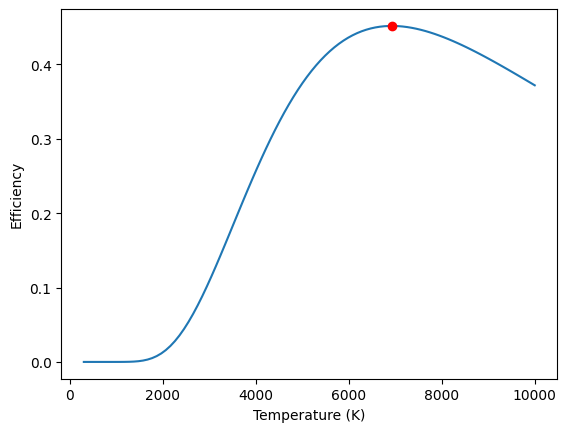

In [26]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import quad

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad

# Constants
h = 6.626e-34  # Planck constant
c = 2.998e8    # Speed of light 
k = 1.381e-23  # Boltzmann constant
l1 = 390e-9    # Lower wavelength of visible light
l2 = 750e-9    # Upper wavelength of visible light

def integrand(x):
    return x**3 / (np.exp(x) - 1)

def efficiency(T):
    a = h*c/(l2*k*T) 
    b = h*c/(l1*k*T)
    I, _ = fixed_quad(integrand, a, b, n=100)
    return 15/np.pi**4 * I

T = np.linspace(300, 10000, 100)
eta = [efficiency(t) for t in T]

plt.plot(T, eta)
plt.plot(optimal_temperature,max_efficiency,'ro')
plt.xlabel('Temperature (K)')
plt.ylabel('Efficiency')

In [32]:
gr = (np.sqrt(5) + 1) / 2 # Golden ratio
def golden_search(f, a, b, tol=1e-9):
    c = b - (b - a) / gr4

    
    d = a + (b - a) / gr
    while abs(b - a) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / gr
        d = a + (b - a) / gr
    return (b + a) / 2

T_opt = golden_search(lambda t: -efficiency(t), 1000, 10000, tol=1)
print(f'Optimal temperature: {T_opt:.0f} K')
print(f'Maximum efficiency: {efficiency(T_opt):.3f}')

Optimal temperature: 6927 K
Maximum efficiency: 0.452


所以在6927K时,白炽灯的效率达到最大值45.2%。要达到这个精度,各物理常数需要至少4位有效数字的精度。

在实际生活中,钨丝灯很难稳定在6900K左右的最佳温度。主要原因有:
(1) 钨的熔点为3695K,在6600K下钨丝会迅速蒸发,灯泡寿命很短。

(2) 高温下钨丝电阻急剧增大,灯丝易断。

(3) 玻璃灯泡在高温下易熔化变形。

(4) 高温下钨丝会与灯泡内残留的气体发生反应。

因此实际的白炽灯一般工作在2700K左右,效率只有5%,大部分能量都以无法被人眼感知的红外辐射形式损耗掉了。这也是白炽灯逐渐被淘汰的原因之一。

In [33]:
print(gr)

1.618033988749895


In [34]:
a=0
b=1
c = b - (b - a) / gr
d = a + (b - a) / gr
print(c,d)

0.3819660112501052 0.6180339887498948


In [35]:
a+0.618

0.618

In [36]:
b-0.618

0.382